In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Column names from the dataset documentation
columns = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight",
    "engine_type", "num_cylinders", "engine_size", "fuel_system",
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"
]

# Load dataset
df = pd.read_csv(url, names=columns)

# Show basic info
print(df.head())
print(df.info())


   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm 

In [15]:
df.shape

(205, 26)

In [21]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

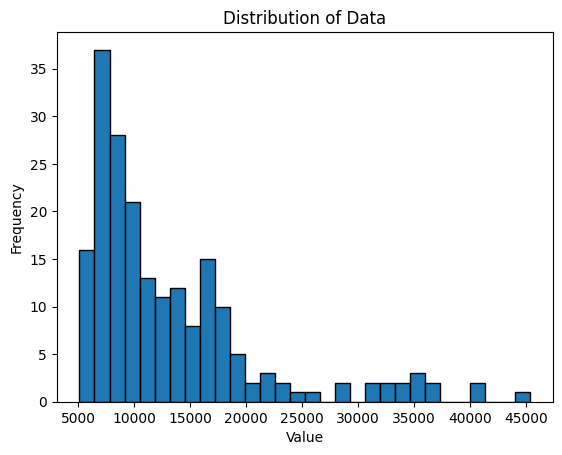

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
plt.hist(df['price'], bins=30, edgecolor='black') # 'bins' controls the number of intervals
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.show()

In [24]:
df = df.dropna()
print(df.shape)

(201, 26)


In [25]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [26]:
# 4. Define features (X) and target (y)
X = df.drop(columns=["price"])
y = df["price"]

# 5. Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# 7. Preprocessing: scale numbers, one-hot encode categories
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# 8. Build pipeline with preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# 9. Train model
model.fit(X_train, y_train)

# 10. Predict on test set
y_pred = model.predict(X_test)

# 11. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 2938.44
R² Score: 0.93


In [27]:
import joblib
# --------------------
# Save model & metadata
# --------------------
joblib.dump(model, "car_price_model.pkl")

metadata = {
    "categorical_cols": categorical_cols,
    "numerical_cols": numerical_cols
}
joblib.dump(metadata, "metadata.pkl")

print("✅ Model and metadata saved successfully!")

✅ Model and metadata saved successfully!
